In [1]:
# Imoprt data and packages 
# Data Wrangling [ Clening ] for analysis 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import re
from collections import defaultdict


In [3]:
test = pd.read_csv('D:\HATHWAY ISP\DSC\Project\Housing\\test.csv')
train = pd.read_csv('D:\HATHWAY ISP\DSC\Project\Housing\\train.csv')


In [4]:
# Rows and Columns avilable in test data frame 
test.shape

(1459, 80)

In [5]:
# Rows and Columns avilable in train data frame 
train.shape

(1460, 81)

In [6]:
# Fetures Avilable in train  
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# Fetures Avilable in train  
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
# Extra Fetures Avilable in train  
set(train.columns).difference(set(test.columns))

{'SalePrice'}

In [9]:
# Shows First Few rows of the data frame 
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
# Shows Last few rows of the data frame 
test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [11]:
# Analysis of the Numeric Columns of the test data frame 
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [12]:
# Analysis of the Numeric Columns of the train data frame 
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
# Identifing the Missing values in the Data Frame 
test['PoolQC'].value_counts(dropna=False)

NaN    1456
Ex        2
Gd        1
Name: PoolQC, dtype: int64

In [14]:
# Visual inspection of Sorted Missing values for every variable  
Col = test.isnull().sum() > 10
test.isnull().sum().sort_values(ascending=False)[ Col ]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
dtype: int64

In [15]:
# Cross Check - Missing Value Count of one of the variable 
test['Alley'].value_counts(dropna=False)

NaN     1352
Grvl      70
Pave      37
Name: Alley, dtype: int64

In [16]:
# Visual inspection of avilable data points of every variable  
test.notnull().sum().sort_values(ascending=False)

SaleCondition    1459
FullBath         1459
LowQualFinSF     1459
2ndFlrSF         1459
1stFlrSF         1459
Electrical       1459
CentralAir       1459
HeatingQC        1459
Foundation       1459
ExterCond        1459
ExterQual        1459
RoofMatl         1459
RoofStyle        1459
YearRemodAdd     1459
YearBuilt        1459
OverallCond      1459
OverallQual      1459
HouseStyle       1459
BldgType         1459
Condition2       1459
Condition1       1459
Neighborhood     1459
LandSlope        1459
LotConfig        1459
LandContour      1459
LotShape         1459
Street           1459
LotArea          1459
MSSubClass       1459
GrLivArea        1459
                 ... 
Exterior2nd      1458
BsmtFinSF1       1458
KitchenQual      1458
SaleType         1458
TotalBsmtSF      1458
BsmtUnfSF        1458
BsmtFinSF2       1458
BsmtHalfBath     1457
BsmtFullBath     1457
Functional       1457
Utilities        1457
MSZoning         1455
MasVnrArea       1444
MasVnrType       1443
BsmtFinTyp

In [17]:
# If we drop all missing values then data frame will be empty 
test.dropna()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [18]:
# Fill missing data with 0 in numeric column and Missing in categorical column


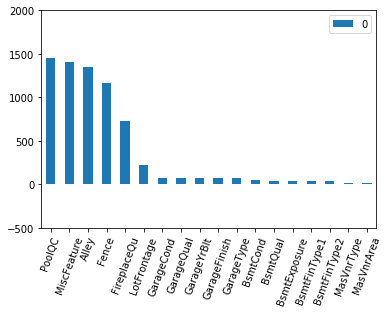

In [19]:
# Plot a graph of Features that contains more than 10 missing values in test data set 
t = test.isnull().sum().sort_values(ascending=False)[test.isnull().sum() > 10 ]
pd.DataFrame(t).plot(kind='bar',rot=70, ylim=[-500,2000], xlim=[0,100])
    

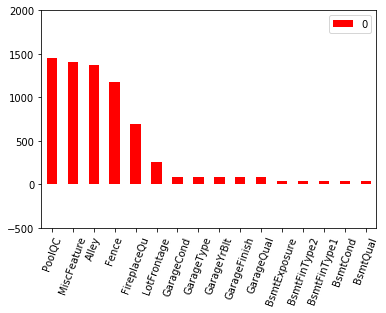

In [20]:
# Plot a graph of Features that contains more than 10 missing values in train  data set 
t1 = train.isnull().sum().sort_values(ascending=False)[train.isnull().sum() > 10 ]
pd.DataFrame(t1).plot(kind='bar',rot=70, ylim=[-500,2000], xlim=[0,100], color='r')

In [260]:
# Read the feature description file and convert it into data frame
file = "D:\HATHWAY ISP\DSC\Project\Housing\\data_description.txt"
feature_list1 = defaultdict()
feature_list2 = defaultdict()
s = ''
with open(file) as fp:
    for line in fp:
        if re.search(':', line):#n test.columns+':':
            if line.split()[0] in test.columns+':':
                s = line.split()[0].replace(':','')
                feature_list1[s] = {}
        else:
            if len(line.split()) != 0:
                feature_list2[line.split()[0]] = line
        feature_list1[s].update(feature_list2)
        feature_list2 = {}
feature_list1_df = pd.DataFrame.from_dict({(i,j): feature_list1[i][j] 
                           for i in feature_list1.keys() 
                           for j in feature_list1[i].keys()},
                       orient='index')

In [261]:
feature_list1_df.columns=['data']
feature_list1_df['data'] = feature_list1_df['data'].str.replace('\t', ' ')
feature_list1_df['data'] = feature_list1_df['data'].str.replace('\n', ' ')
feature_list1_df = feature_list1_df.transpose()
feature_list1_df

,"(MSSubClass, 20)","(MSSubClass, 30)","(MSSubClass, 40)","(MSSubClass, 45)","(MSSubClass, 50)","(MSSubClass, 60)","(MSSubClass, 70)","(MSSubClass, 75)","(MSSubClass, 80)","(MSSubClass, 85)",...,"(SaleType, ConLw)","(SaleType, ConLI)","(SaleType, ConLD)","(SaleType, Oth)","(SaleCondition, Normal)","(SaleCondition, Abnorml)","(SaleCondition, AdjLand)","(SaleCondition, Alloca)","(SaleCondition, Family)","(SaleCondition, Partial)"
data,20 1-STORY 1946 & NEWER ALL STYLES,30 1-STORY 1945 & OLDER,40 1-STORY W/FINISHED ATTIC ALL AGES,45 1-1/2 STORY - UNFINISHED ALL AGES,50 1-1/2 STORY FINISHED ALL AGES,60 2-STORY 1946 & NEWER,70 2-STORY 1945 & OLDER,75 2-1/2 STORY ALL AGES,80 SPLIT OR MULTI-LEVEL,85 SPLIT FOYER,...,ConLw Contract Low Down payment and low...,ConLI Contract Low Interest,ConLD Contract Low Down,Oth Other,Normal Normal Sale,"Abnorml Abnormal Sale - trade, foreclo...",AdjLand Adjoining Land Purchase,Alloca Allocation - two linked properti...,Family Sale between family members,Partial Home was not completed when las...
